# Logistic Regression
1. What is Logistic Regression, and how does it differ from Linear Regression?
  - Logistic Regression: Used for classification tasks (binary or multiclass), output is a probability between 0 and 1.
  - Linear Regression: Used for regression tasks (predicting continuous values), output is a real number.


2. What is the mathematical equation of Logistic Regression?
  - P(y=1∣x)=1/1+e −(β 0​ +β 1x 1​ +β 2x 2​ +...+β nx n​)
3. Why do we use the Sigmoid function in Logistic Regression?
   - It maps any real number to a value between 0 and 1.
   - Useful for modeling probabilities of class membership.
4. What is the cost function of Logistic Regression?
  - Cost(h θ(x),y)=[y⋅log(h θ(x))+(1−y)⋅log(1−h θc(x))]
5. What is Regularization in Logistic Regression?
  - A technique to prevent overfitting.
  - It adds a penalty to large coefficients in the cost function.
6. Why is it needed Explain the difference between Lasso, Ridge, and Elastic Net regression?
  - Needed to reduce overfitting and improve generalization.
  - Lasso (L1): Shrinks some coefficients to zero (performs feature selection).
  - Ridge (L2): Shrinks coefficients smoothly but does not set them to zero.
  - Elastic Net: A mix of L1 and L2; combines benefits of both.
7. When should we use Elastic Net instead of Lasso or Ridge?
  - Use Elastic Net when:
    - You have many correlated features.
    - You want both feature selection and regularization.
8. What is the impact of the regularization parameter (λ) in Logistic 9. Regression?
  - High λ: Strong regularization, may underfit.
  - Low λ: Weak regularization, may overfit.
  - It controls the trade-off between fitting the data and keeping coefficients small.
9. What are the key assumptions of Logistic Regression?
  - No multicollinearity among predictors.
  - Linear relationship between independent variables and the log-odds.
  - Large sample size.
  - Independence of observations.
10. What are some alternatives to Logistic Regression for classification tasks?
  - Decision Trees
  - Random Forest
  - Support Vector Machines (SVM)
  - K-Nearest Neighbors (KNN)
  - Naive Bayes
  - Neural Networks
11. What are Classification Evaluation Metrics ?
  - Accuracy
  - Precision
  - Recall
  - F1-Score
  - ROC-AUC Score
  - Confusion Matrix
12. How does class imbalance affect Logistic Regression?
  - Can lead to biased predictions toward the majority class.
  - Solutions:
    - Resampling techniques
    - Class weights
    - SMOTE (Synthetic Minority Over-sampling Technique)
13. What is Hyperparameter Tuning in Logistic Regression?
  - Adjusting model parameters like:
  - Regularization strength (λ or C)
  - Type of penalty (L1, L2)
  - Solver
  - Done using Grid Search or Random Search with Cross-validation.
14. What are different solvers in Logistic Regression?
  - liblinear: Good for small datasets, supports L1 and L2.
  - saga: Supports Elastic Net and works with large datasets.
  - lbfgs: Good for L2 penalty and multiclass classification.
  - newton-cg: Like lbfgs but uses Newton’s method.
15. Which one should be used How is Logistic Regression extended for multiclass
classification?
  - Use liblinear for small datasets.
  - Use saga/lbfgs for large datasets or when using Elastic Net.
  - For multiclass:
    - One-vs-Rest (OvR): Builds a binary classifier for each class.
    - Softmax (Multinomial): Generalization of logistic regression for multiple classes.
16. What are the advantages and disadvantages of Logistic Regression?
  - Advantages:
    - Simple and interpretable
    - Fast and efficient
    - Works well with linearly separable data
  - Disadvantages:
    - Assumes linear relationship (log-odds)
    - Not suitable for complex relationships
    - Can underperform on high-dimensional data
17. What are some use cases of Logistic Regression?
  - Spam detection
  - Credit scoring
  - Disease diagnosis
  - Customer churn prediction
  - Fraud detection
18. What is the difference between Softmax Regression and Logistic Regression?
  -  Logistic Regression: For binary classification.
  - Softmax Regression: For multiclass classification, outputs probabilities for all classes.
19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?
  - OvR: Simple, effective for small datasets.
  - Softmax: Better when classes are mutually exclusive and correlated.


20. How do we interpret coefficients in Logistic Regression?
  - Coefficients show the change in log-odds of the outcome for a one-unit change in the predictor. 𝑒𝛽𝑖eβi​
 : Tells how the odds change when 𝑥𝑖x i​ increases by 1.




In [28]:
 #1.Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.
 from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and check accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9333333333333333


In [31]:
#2.Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X = X[y != 2]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy with L1:", accuracy_score(y_test, y_pred))


Accuracy with L1: 1.0


In [32]:
#3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Coefficients:", model.coef_)


Accuracy: 1.0
Coefficients: [[-0.39340204  0.96258576 -2.37510761 -0.99874603]
 [ 0.50840364 -0.25486503 -0.21301366 -0.77575487]
 [-0.1150016  -0.70772072  2.58812127  1.77450091]]


In [33]:
#4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X = X[y != 2]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy with Elastic Net:", accuracy_score(y_test, y_pred))


Accuracy with Elastic Net: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [34]:
#5.Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Multiclass Accuracy (OvR):", accuracy_score(y_test, y_pred))


Multiclass Accuracy (OvR): 0.8666666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [35]:
  #6.Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=200)

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
y_pred = grid_search.best_estimator_.predict(X_test)
print("Accuracy with best parameters:", accuracy_score(y_test, y_pred))


Best Parameters: {'C': 10, 'penalty': 'l2'}
Accuracy with best parameters: 0.9333333333333333


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

In [36]:
#7.Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

data = load_iris()
X = data.data
y = data.target

model = LogisticRegression(max_iter=200)

skf = StratifiedKFold(n_splits=5)

scores = cross_val_score(model, X, y, cv=skf)

print("Average Accuracy:", scores.mean())


Average Accuracy: 0.9733333333333334


In [37]:
#8.Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = pd.read_csv('your_dataset.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

In [38]:
#9.Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=200)

param_dist = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
y_pred = random_search.best_estimator_.predict(X_test)
print("Accuracy with best parameters:", accuracy_score(y_test, y_pred))



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 1}
Accuracy with best parameters: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

In [39]:
#10.Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=200)
ovo_model = OneVsOneClassifier(model)
ovo_model.fit(X_train, y_train)

y_pred = ovo_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9666666666666667


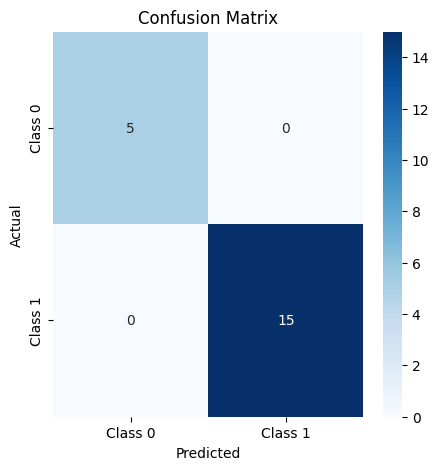

In [40]:
#11.Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np

data = load_iris()
X = data.data
y = data.target

X = X[y != 2]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [41]:
#12.Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

data = load_iris()
X = data.data
y = data.target

X = X[y != 2]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [42]:
#13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], flip_y=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced', max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy with class weights:", accuracy_score(y_test, y_pred))


Accuracy with class weights: 0.825


In [43]:
#14.Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('titanic.csv')
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])
data = data.dropna(subset=['Embarked'])
data = data.drop(columns=['Name', 'Ticket', 'Cabin'])
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

X = data.drop(columns=['Survived'])
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

In [44]:
#15.Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)

# Train and evaluate without scaling
model.fit(X_train, y_train)
y_pred_no_scaling = model.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# Apply standardization (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate with scaling
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy without scaling:", accuracy_no_scaling)
print("Accuracy with scaling:", accuracy_scaled)


Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


In [45]:
#16.Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

print("ROC-AUC score:", roc_auc)


ROC-AUC score: 1.0


In [46]:
#17.Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(C=0.5, max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 1.0


In [47]:
#18.Write a Python program to train Logistic Regression and identify important features based on model coefficients
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

coefficients = model.coef_

important_features = pd.DataFrame(coefficients, columns=feature_names)
print("Feature importance (based on coefficients):")
print(important_features)


Feature importance (based on coefficients):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.393402          0.962586          -2.375108         -0.998746
1           0.508404         -0.254865          -0.213014         -0.775755
2          -0.115002         -0.707721           2.588121          1.774501


In [48]:
#19.Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

kappa_score = cohen_kappa_score(y_test, y_pred)

print("Cohen's Kappa Score:", kappa_score)


Cohen's Kappa Score: 1.0


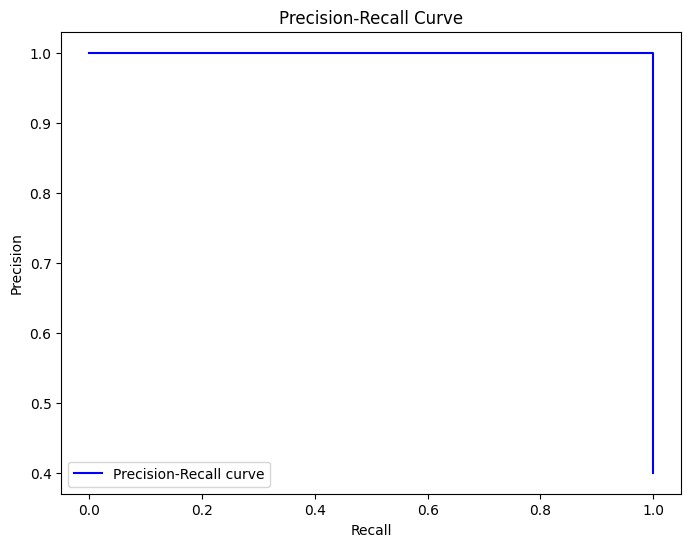

In [49]:
#20.Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classificatio
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

data = load_iris()
X = data.data
y = data.target

X = X[y != 2]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [50]:
#21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

solvers = ['liblinear', 'saga', 'lbfgs']
accuracies = {}

for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[solver] = accuracy

for solver, accuracy in accuracies.items():
    print(f"Accuracy with solver '{solver}': {accuracy}")


Accuracy with solver 'liblinear': 1.0
Accuracy with solver 'saga': 1.0
Accuracy with solver 'lbfgs': 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [51]:
#22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mcc = matthews_corrcoef(y_test, y_pred)

print("Matthews Correlation Coefficient (MCC):", mcc)


Matthews Correlation Coefficient (MCC): 1.0


In [52]:
#23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate on raw data
model_raw = LogisticRegression(max_iter=200)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate on standardized data
model_scaled = LogisticRegression(max_iter=200)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy on raw data:", accuracy_raw)
print("Accuracy on standardized data:", accuracy_scaled)


Accuracy on raw data: 1.0
Accuracy on standardized data: 1.0


In [53]:
#24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

model = LogisticRegression(max_iter=200)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_['C']
print("Optimal C (regularization strength):", best_C)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with optimal C:", accuracy)


Optimal C (regularization strength): 1
Accuracy with optimal C: 1.0


In [54]:
#25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.
import joblib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
joblib.dump(model, 'logistic_regression_model.pkl')
loaded_model = joblib.load('logistic_regression_model.pkl')
y_pred = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the loaded model:", accuracy)


Accuracy of the loaded model: 1.0
